Импортируйте нужные библиотеки
===
Мы уже много работали с  pandas, numpy и различными инструментами визуализации. Поэтому предлагаем вам самим импортировать те библиотеки, которые вам нужны для выполнения домашнего задания 

Временной ряд 
=== 
В папке datasets у нас находится множество различных временных рядов, которые состоят из двух колонок - времени и значения. Можно взять любые данные на выбор, кроме того, который мы разобрали на лекции (shampoo_sales). 

Задание 
==

* Сделайте визуализацию ряда
* Разбейте его на компоненты
* Проверьте автокорреляцию
* Примените одну или несколько трансформаций, разобранных на лекции

# Импорт библиотек

In [91]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.graph_objects import *
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [92]:
df = pd.read_csv('.\datatest\\airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Визуализация ряда

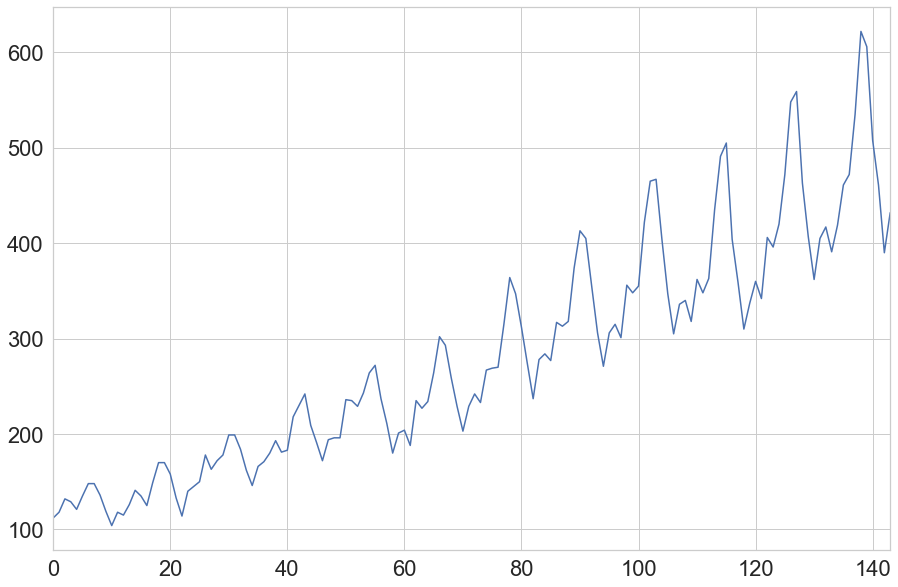

In [106]:
df['Passengers'].plot()

In [107]:

df['date']=df['Month'].apply(lambda x: str(x) +'-01')
s= pd.Series(index=pd.to_datetime(df['date']),
            data=df['Passengers'].values)

In [108]:
s

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

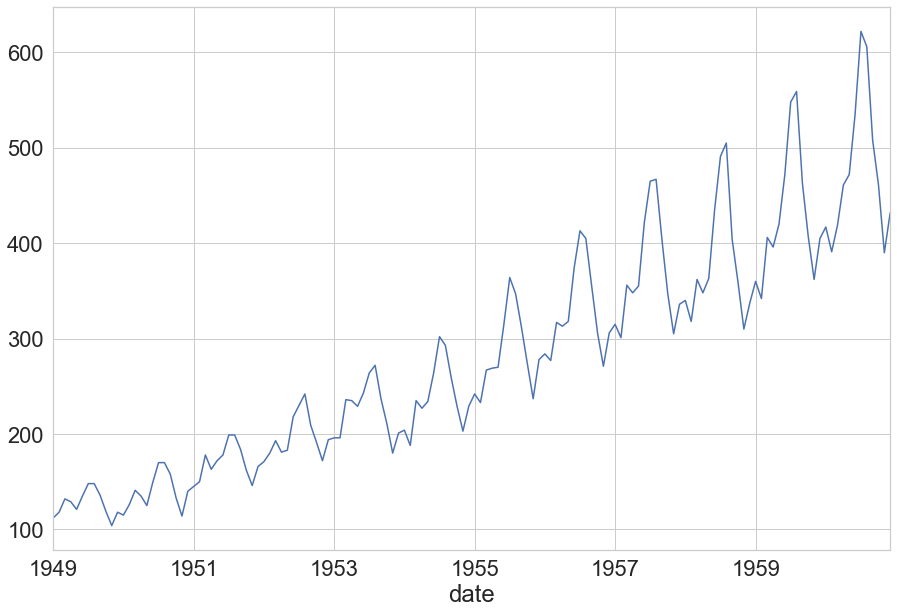

In [109]:
s.plot()

# Тренд

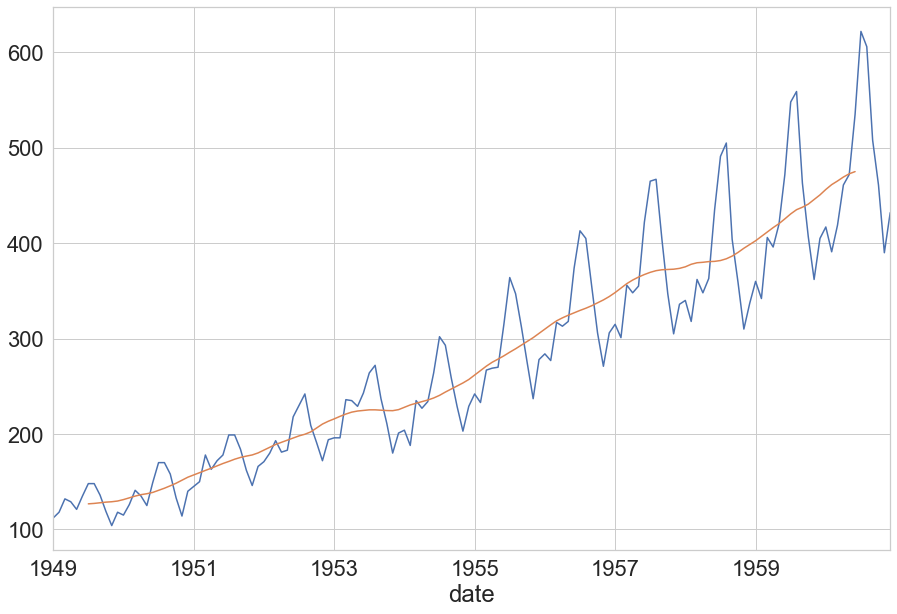

In [110]:
result = seasonal_decompose(s, model='additive')
s.plot()
result.trend.plot()


# Сезонность

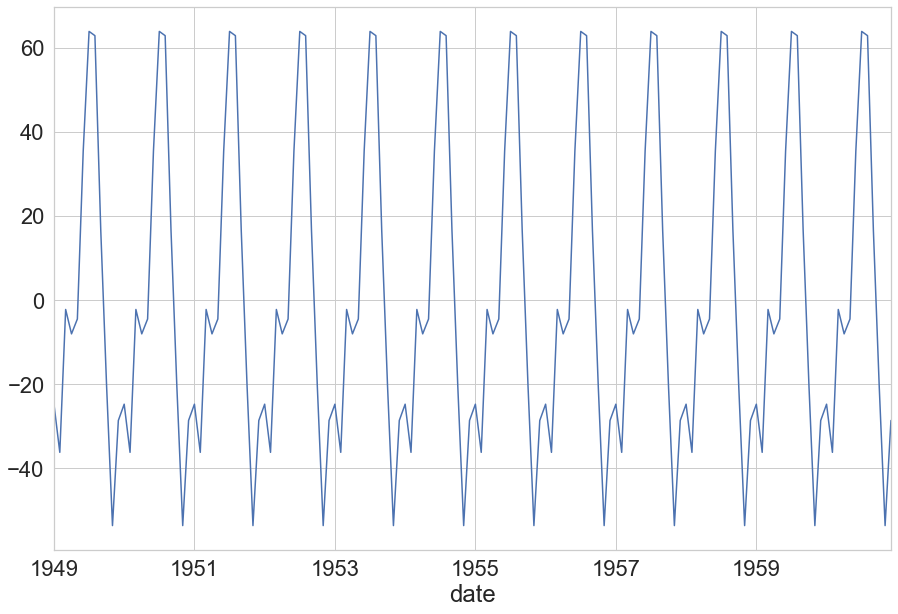

In [111]:
result.seasonal.plot()

# Шум

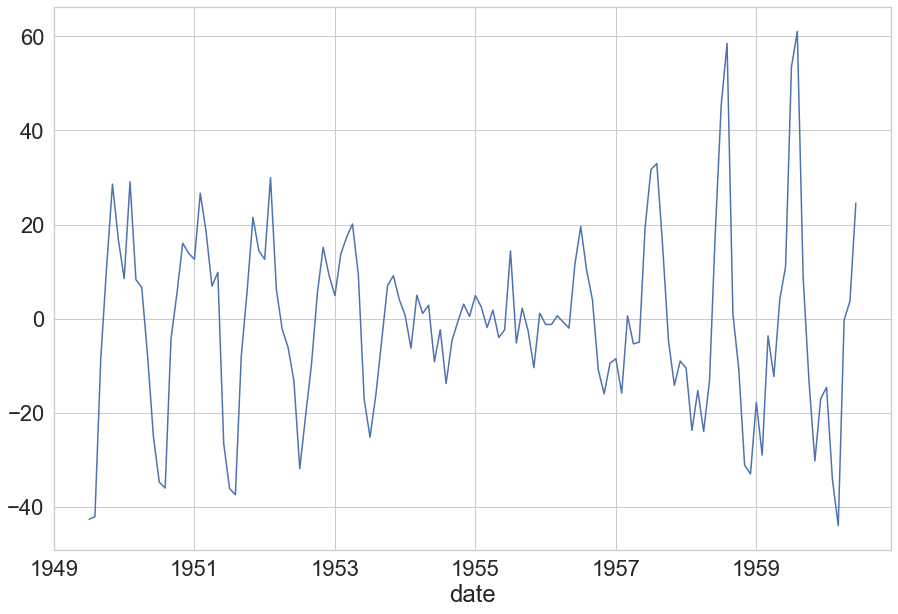

In [112]:
result.resid.plot()

Автокорреляция
===

In [113]:
for i in range(1,10):
    df[f'lag-{i}'] = df['Passengers'].shift(i)
    
iplot(Figure(data=Scatter(x=df['date'],y=df['Passengers'])))
df[[f'lag-{i}'for i in range(1,10)]+['Passengers']].corr()['Passengers']

lag-1         0.960195
lag-2         0.895675
lag-3         0.837395
lag-4         0.797735
lag-5         0.785943
lag-6         0.783919
lag-7         0.784592
lag-8         0.792215
lag-9         0.827852
Passengers    1.000000
Name: Passengers, dtype: float64

# Box-Cox Transform

In [115]:
from scipy.stats import boxcox

In [116]:
df['boxcos']=boxcox(df['Passengers'],lmbda=0)

In [117]:
iplot(Figure(data=Scatter(x=df['date'],y=df['boxcos'])))

# Power transform

In [119]:
from scipy.optimize import curve_fit

def func(x,p,a):
    return x**p+a

x = [i for i in range(len(df))]

popt, _ = curve_fit(func,x,  df['Passengers'])
p = popt[0]
a = popt[1]
print(p,a)
y_hat = func(x,p,a)

trace1 = Scatter(x=x,y=df['Passengers'], name = 'Original data')
trace2 = Scatter(x=x,y=y_hat, name = 'Fitted curve')

iplot(Figure(data=[trace1,trace2]))

1.1934843498536616 109.87860618123472
